# Lab 6

**Name : Sneha Gupta <br>
RegNo: 21112341 <br>
Class: 4BScEA** 
****

### **Problem Statement:** <br>
On a classification dataset of cancer patients, perform Decision Tree and Random Forest. Compare which algorithm gives better accuracy and perform hypararameter tuning.

### **Methodology:** <br>
* Import excel file
* Perform label encoding
* Random forest algorithm
* Decision tree algorithm
* Hyperparameter Tuning

### **Observation:** <br>
* Accuracy is 92% using Decision Tree and 94% using Random forest.
* Using hyperparametr tuning, accuracy became 98%.

### **Learnings:** <br>
* Perform hyperparameter tuning regression
* Comparision between random forest and decision tree
* Understanding use of hyperparameters and oob score.

In [1]:
#Importing necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as Model

In [2]:
df = pd.read_excel("C:\\Users\\Lenovo\\Downloads\\cancer patient data sets.xlsx",index_col=False)
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


### `LABEL ENCODING`

In [3]:
Level = LabelEncoder()
df['Level'] = Level.fit_transform(df['Level'])

### `USING CORRELATION TO CHOOSE FEATURES`

In [4]:
df.corr()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.042631
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,0.086222
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,-0.577269
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,-0.434071
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,-0.264926
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,-0.363748
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,-0.423382
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,-0.432405
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,-0.618781
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422,-0.561961


### `RANDOM FOREST`

In [5]:
X = df.drop(['Level','Patient Id','Swallowing Difficulty','Weight Loss','Air Pollution','OccuPational Hazards','Obesity'],axis=1)
y = df['Level']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 30)

In [7]:
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', oob_score=True , max_depth = 3)
model.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:584: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=10,
                       oob_score=True)

In [8]:
model.oob_score_

0.948

**Accuracy is 95% using Random Forest**

In [9]:
# Create decison tree classifier object
clf = Model(criterion = 'entropy', max_depth = 3)

# Train decision tree classifier
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# by default, decision tree classifier uses gini index

In [10]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.92


**Accuracy is 92% using Decision Tree**

[Text(0.4583333333333333, 0.875, 'x[10] <= 5.5\nentropy = 1.579\nsamples = 750\nvalue = [280, 224, 246]'),
 Text(0.25, 0.625, 'x[13] <= 4.5\nentropy = 1.103\nsamples = 432\nvalue = [7, 211, 214]'),
 Text(0.16666666666666666, 0.375, 'x[11] <= 3.5\nentropy = 0.855\nsamples = 267\nvalue = [7, 211, 49]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.215\nsamples = 205\nvalue = [0, 198, 7]'),
 Text(0.25, 0.125, 'entropy = 1.208\nsamples = 62\nvalue = [7, 13, 42]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 165\nvalue = [0, 0, 165]'),
 Text(0.6666666666666666, 0.625, 'x[15] <= 1.5\nentropy = 0.711\nsamples = 318\nvalue = [273, 13, 32]'),
 Text(0.5, 0.375, 'x[4] <= 6.5\nentropy = 1.532\nsamples = 55\nvalue = [17, 13, 25]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.987\nsamples = 30\nvalue = [17, 13, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.0\nsamples = 25\nvalue = [0, 0, 25]'),
 Text(0.8333333333333334, 0.375, 'x[14] <= 1.5\nentropy = 0.177\nsamples = 263\nv

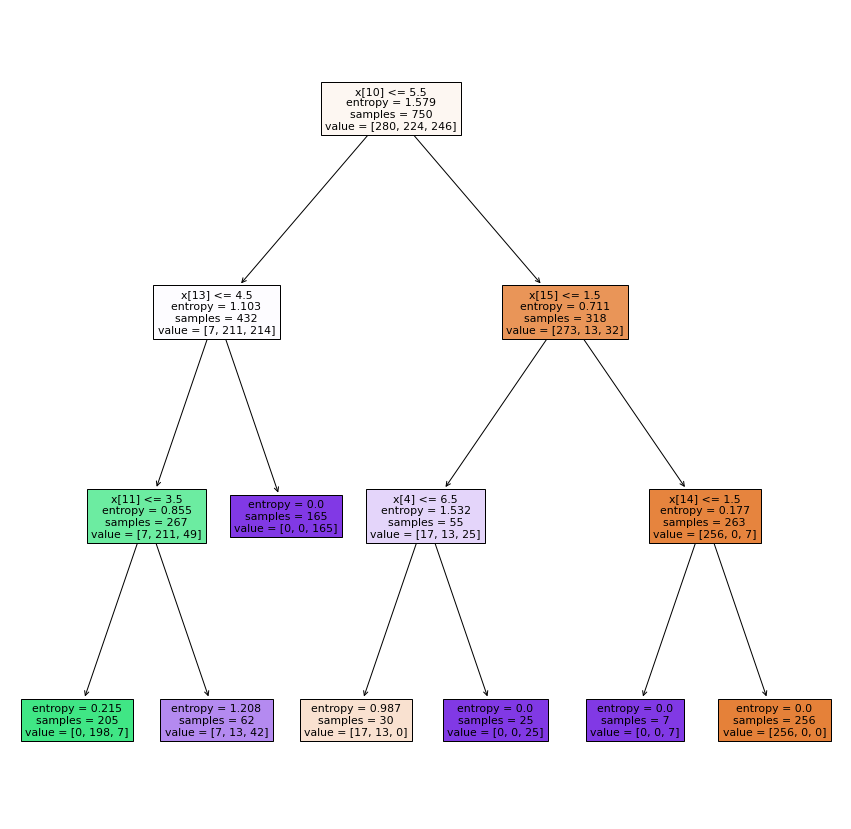

In [12]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True)

### `HYPERPARAMETERTUNING`

In [13]:
lgreg1=LogisticRegression(multi_class='ovr',solver='liblinear')

In [14]:
parameters = {'penalty':['l1','l2'],'C':[1,2.0,3.0,4.0,5.0],'max_iter':[100,200,300,400,500,600]}

In [15]:
from sklearn.model_selection import GridSearchCV
grid_class1=GridSearchCV(lgreg1,param_grid=parameters,scoring='accuracy',cv=5)

In [16]:
grid_class1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': [1, 2.0, 3.0, 4.0, 5.0],
                         'max_iter': [100, 200, 300, 400, 500, 600],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [17]:
print(grid_class1.best_params_)

{'C': 5.0, 'max_iter': 100, 'penalty': 'l1'}


In [18]:
print(grid_class1.best_score_)

0.9893333333333334


<hr>